# Theoretical model of the effects of HPV vaccines on the collective reduction HPV based cancers.

Our main desire is to estimate a theoretical model that shows the effects of HPV vaccines on the "collective" reduction of HPV based cancers, using only aggregated data at population level (hence the word collective). Since, we are not considering individuals cases, we can at most estimate a "collective efficiency" $\alpha$, with it we can make a rought prediction of the future. 

Hence we assume the model has the following 
$$M_f(age, year) = C_f(age,year) - \alpha \frac{1}{2} \sum_{i=year_0}^{year} \left[V(age_i,i) + V(age_{i-1},i) \right]$$
where $age_i = age - (year - i)$

$C_f$: cancer incidence rate, where $f$ is the cancer type. Denotes the predicted number of new cancer cases for a person of x-age at y-year. Not taking into consideration HPV vaccine. Thus fitted to data prior to vaccination.

$V$: HPV vaccination. Denotes the predicted number of people that people take the vaccine

$\alpha$: Denotes the overall effect, HPV vaccines have on aggregated data.

Task: Here we fit a model to men's and women's HPV vaccination

### Loading data

In [1]:
### Importing various packages
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import *
import scipy.io as sio

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

In [2]:
## Data files directory and names
filesname_men_age = [r'data_files/menn/kreft.menn.53-17..xlsx', r'data_files/menn/reseptregisteret_menn_norge.xls']
filesname_men_region = [r'data_files/menn/menn.kreft.fylker.71-17.xlsx', r'data_files/menn/reseptmennfylker.xls']

filesname_women_age = [r'data_files/kvinne/kvinner.kreft.53-17.xlsx', 
                       r'data_files/kvinne/reseptregisteret_women_norge.xls']
filesname_women_region = [r'data_files/kvinne/kvinner.kreft.fylker.71-17.xlsx', 
                          r'data_files/kvinne/reseptkvinnerfylker.xls']

## reading excel files 
men_data_age = []
women_data_age = []
for i in range(len(filesname_men_age)):
    men_data_age.append(pp.excel_lines(filesname_men_age[i]))  
for i in range(len(filesname_women_age)):
    women_data_age.append(pp.excel_lines(filesname_women_age[i]))
    
men_data_region = []
women_data_region = []
for i in range(len(filesname_men_region)):
    men_data_region.append(pp.excel_lines(filesname_men_region[i]))  
for i in range(len(filesname_women_region)):
    women_data_region.append(pp.excel_lines(filesname_women_region[i]))

In [3]:
### Processing HPV vaccine
## Men age
#--------------------------------------------------------------------------------
dataframe = men_data_age[1][8:293]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

# producing x- and y-axis
V_y_age = [i for i in range(2000,2019)]                # corresponding years
V_x_age = [(2 + i*5) for i in range(19) ]              # estimated corresponding ages
V_x_age_label = np.array(pd_registry['Age'][0:19])     # corresponding ages label

## extracting data for each year, where each list corresponds to an age
pd_data = []

# loop over all years
for i in range(15):
    start = i*19
    end = (1 + i)*19
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

## changing "under 5" labels data to 2
pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( np.array(pd_data[i]) )

# adding zeros to make it a square matrix    
V_Z_ageM = (np.array(list(np.zeros((4,19)))+pd_data2)).astype(np.float64)
#--------------------------------------------------------------------------------
## Women age
#--------------------------------------------------------------------------------
dataframe = women_data_age[1][8:293]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

## extracting data for each year, where each list corresponds to an age
pd_data = []

# loop over all years
for i in range(15):
    start = i*19
    end = (1 + i)*19
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

## changing "under 5" labels data to 2
pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( np.array(pd_data[i]) )

# adding zeros to make it a square matrix
V_Z_ageW = (np.array(list(np.zeros((4,19)))+pd_data2)).astype(np.float64)

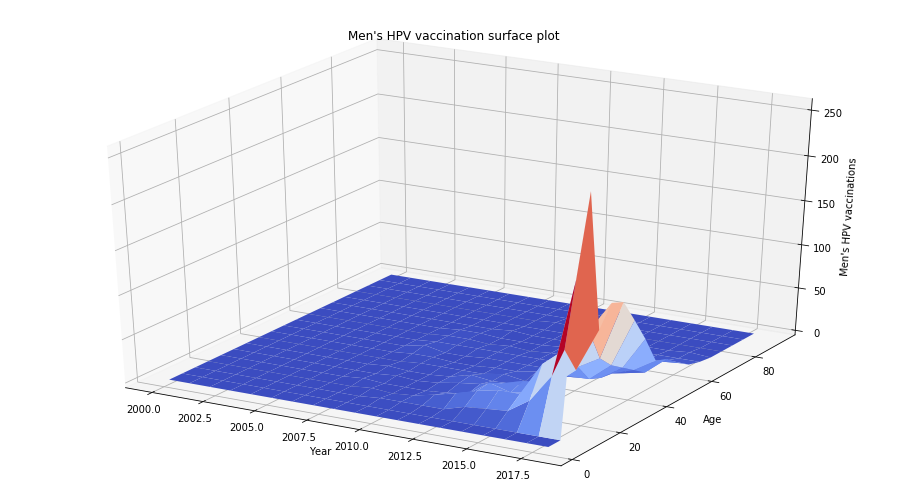

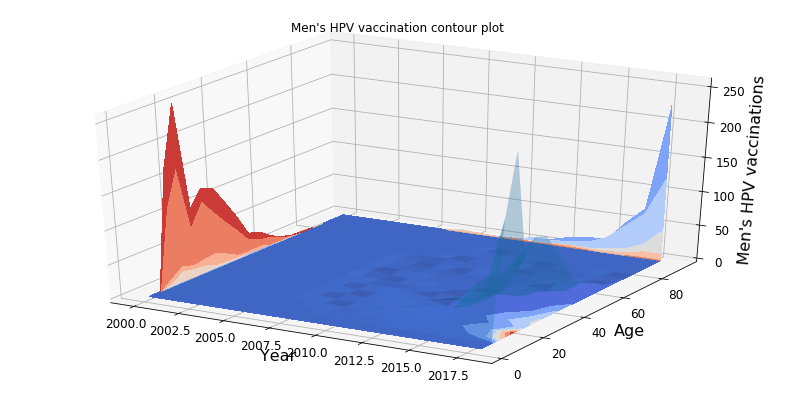

In [4]:
fig, ax = mpf.surface_plot(Z = V_Z_ageM.T, X=V_y_age, Y=V_x_age, titl="Men's HPV vaccination surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Men's HPV vaccinations")
fig.savefig("plots/Model/Men's_HPV_vaccination_surface_plot.png")

fig, ax = mpf.contour3d_plot(Z = V_Z_ageM.T, X=V_y_age, Y=V_x_age, titl="Men's HPV vaccination contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Men's HPV vaccinations")
fig.savefig("plots/Model/Men's_HPV_vaccination_contour_plot.png")

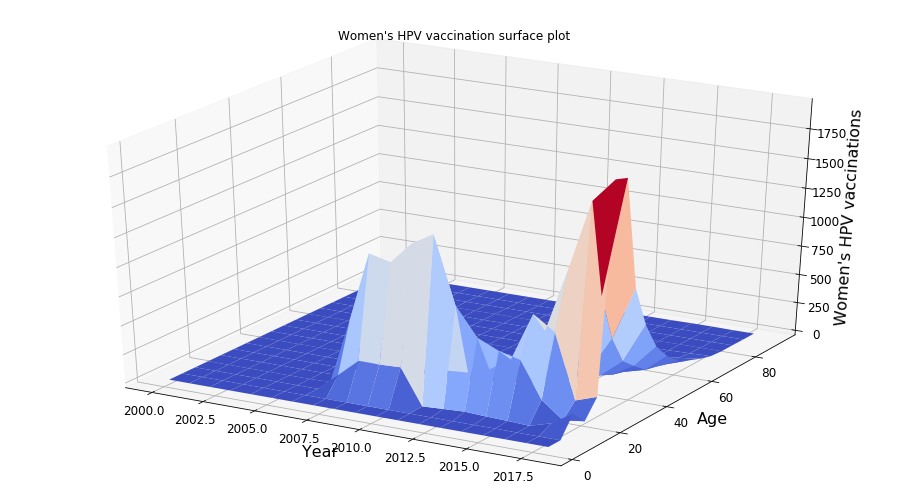

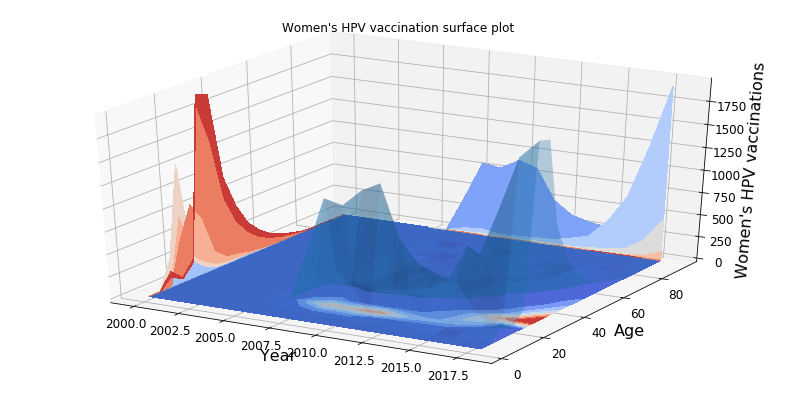

In [5]:
fig, ax = mpf.surface_plot(Z = V_Z_ageW.T, Y=V_x_age, X=V_y_age, titl="Women's HPV vaccination surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Women's HPV vaccinations")
fig.savefig("plots/Model/Women's_HPV_vaccination_surface_plot.png")

fig, ax = mpf.contour3d_plot(Z = V_Z_ageW.T, Y=V_x_age, X=V_y_age, titl="Women's HPV vaccination surface plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Women's HPV vaccinations")
fig.savefig("plots/Model/Women's_HPV_vaccination_contour_plot.png")

### polynomial fitting model

$$ y = a_1 + a_2 x + a_3 y + a_4 xy \dots$$

In [6]:
# inporting defined functions for regression studie
import Regression_functions as rf
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

#### Men's fitting

In [7]:
order= 30

# x and y axis
rows = V_y_age
cols = V_x_age
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)
lasso = Lasso(0.5, max_iter=10000).fit(design_matrix, V_Z_ageM.ravel())


## prediction
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

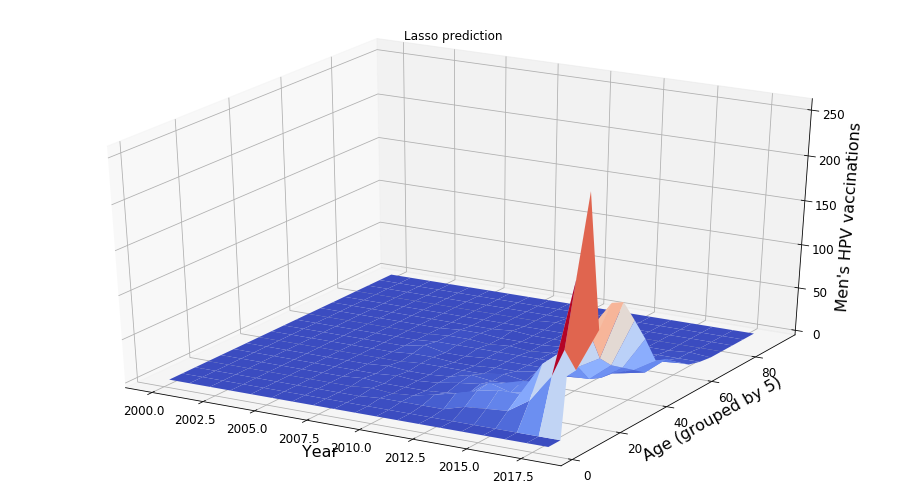

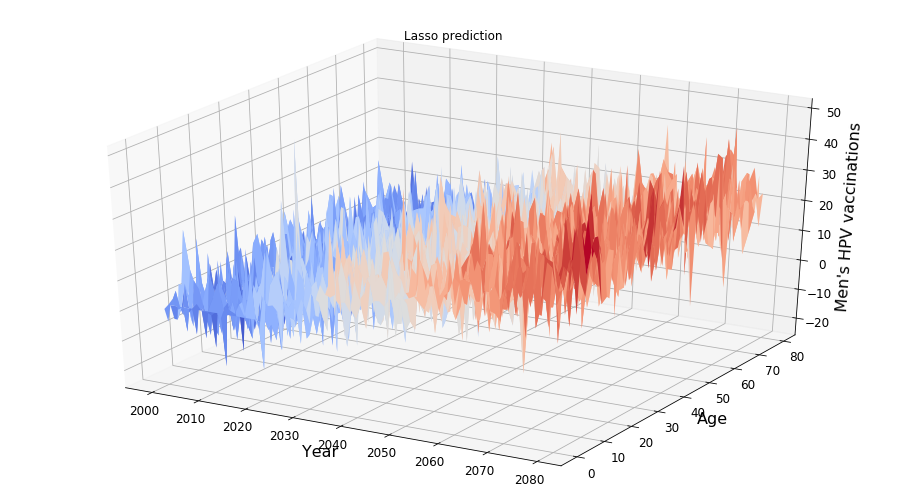

In [8]:
# same scaling
temp = lasso.predict(design_matrix)
ZpredicLasso = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=V_y_age, Y=V_x_age, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', 
                           Zlabel="Men's HPV vaccinations")

# different scaling
temp = lasso.predict(Xnew)
ZpredicLasso = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=ynew, Y=xnew, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age', Zlabel="Men's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.0000 and the r^2-score is: 1.0000.
    The test MSE is: 880.9242 and the r^2-score is: -0.6473
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 1214192.1768 and the r^2-score is: -2554.8897.
    The test MSE is: 2039238818.1927 and the r^2-score is: -3813328.6185
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 0.0003 and the r^2-score is: 1.0000.
    The test MSE is: 959.6618 and the r^2-score is: -0.7945
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.00000; the train average R^2-score for fold 1 is: 1.00
The test average MSE for fold 1 is: 1550.41896; the test average R^2-score for fold 1 is: -2.70
The train 

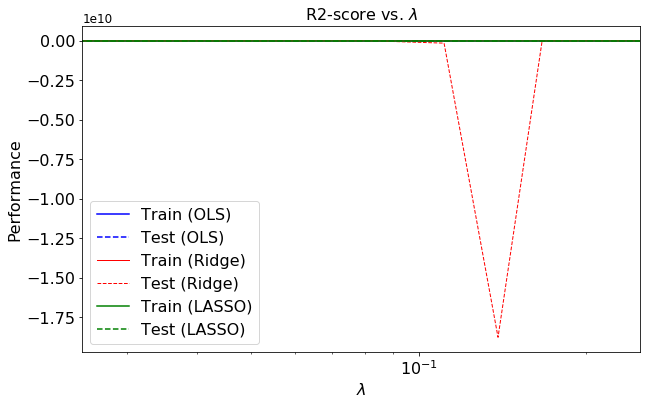

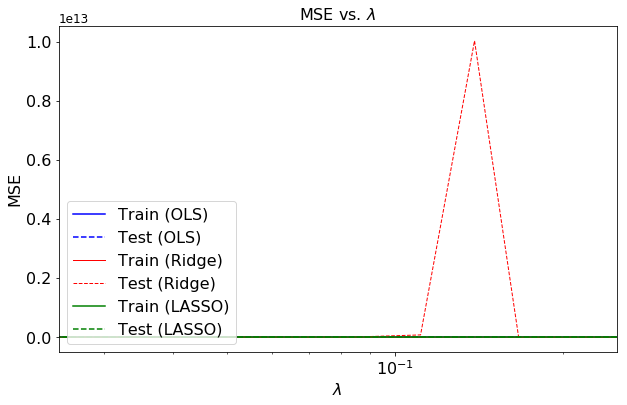

In [9]:
lambdas = np.linspace(0,0.25,10) # different lambda values


data = design_matrix
output = V_Z_ageM.ravel()

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

#### Women's fitting 

In [10]:
order= 30

# x and y axis
rows = V_y_age
cols = V_x_age
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)
lasso = Lasso(0.5, max_iter=10000).fit(design_matrix, V_Z_ageW.ravel())


## prediction
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

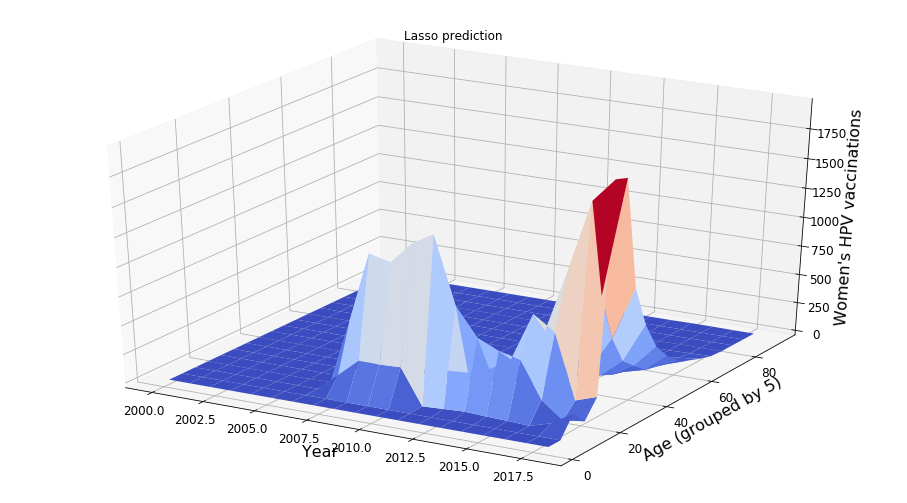

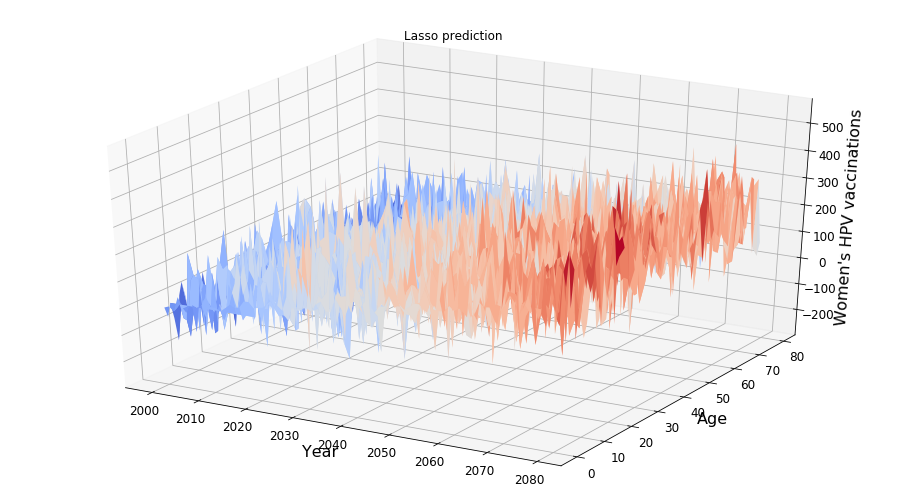

In [11]:
# same scaling
temp = lasso.predict(design_matrix)
ZpredicLasso = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=V_y_age, Y=V_x_age, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', 
                           Zlabel="Women's HPV vaccinations")

# different scaling
temp = lasso.predict(Xnew)
ZpredicLasso = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=ynew, Y=xnew, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age', Zlabel="Women's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.0000 and the r^2-score is: 1.0000.
    The test MSE is: 880.9242 and the r^2-score is: -0.6473
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 1214192.1768 and the r^2-score is: -2554.8897.
    The test MSE is: 2039238818.1927 and the r^2-score is: -3813328.6185
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 0.0003 and the r^2-score is: 1.0000.
    The test MSE is: 959.6618 and the r^2-score is: -0.7945
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.00000; the train average R^2-score for fold 1 is: 1.00
The test average MSE for fold 1 is: 1598.47433; the test average R^2-score for fold 1 is: -40.13
The train

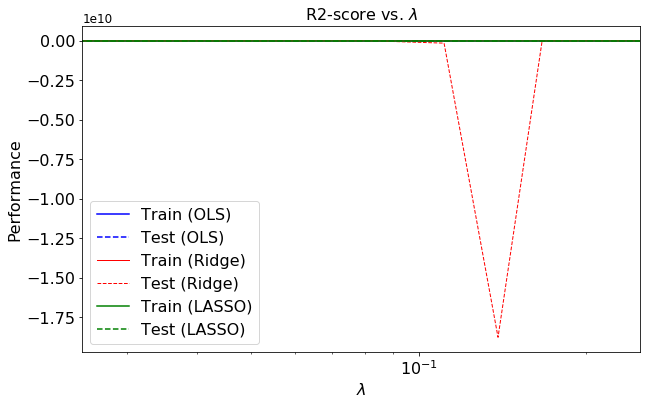

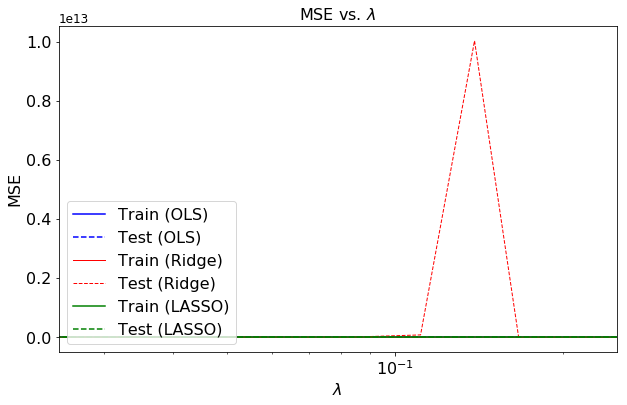

In [12]:
lambdas = np.linspace(0,0.25,10) # different lambda values


data = design_matrix
output = V_Z_ageM.ravel()

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

### Exponential fitting model

$$y = e^{a_1 + a_2 x + a_3 y + a_4 xy \dots}$$

#### Men's fitting

In [13]:
### Defining design matrix and prediction matrix
order = 11          # polynomial order
iterations = 10000 # number of iterations use 

# x and y axis
C = 0.0001 # constant used to tackle zeros
rows = V_y_age
cols = V_x_age
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)

## predictions matrix
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

In [14]:
## error minimization
ols = LinearRegression(fit_intercept=True).fit(design_matrix, np.log10(V_Z_ageM.ravel()+C))
#ridge = Ridge(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(V_Z_ageM.ravel()+C))
#lasso = Lasso(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(V_Z_ageM.ravel()+C))

beta_male = ols.coef_

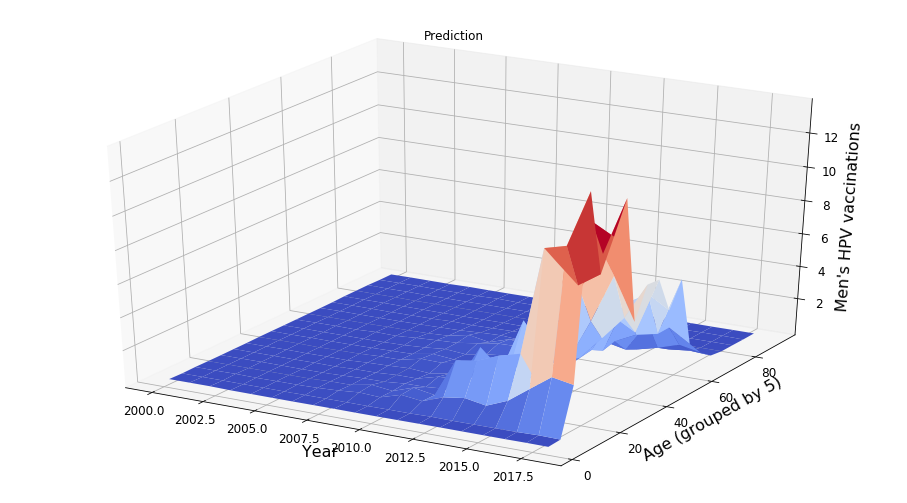

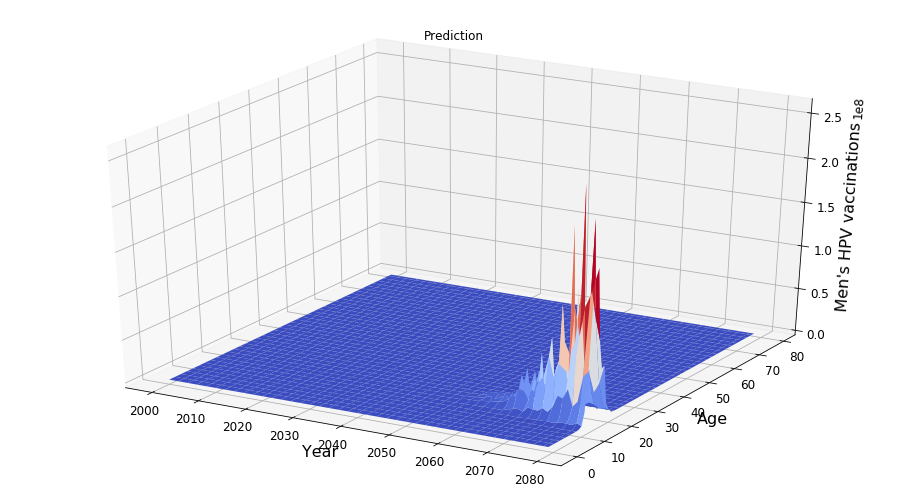

In [15]:
# same scaling
temp = np.exp(ols.predict(design_matrix))-C
Zpredic = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=V_y_age, Y=V_x_age, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', Zlabel="Men's HPV vaccinations")

# different scaling
temp = np.exp(ols.predict(Xnew))-C
Zpredic = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=ynew, Y=xnew, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age', Zlabel="Men's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.7161 and the r^2-score is: 0.8605.
    The test MSE is: 1.9027 and the r^2-score is: 0.6516
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 46.5107 and the r^2-score is: -8.0630.
    The test MSE is: 40.9778 and the r^2-score is: -6.5030
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 1.2848 and the r^2-score is: 0.7496.
    The test MSE is: 2.7858 and the r^2-score is: 0.4899
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.94111; the train average R^2-score for fold 1 is: 0.82
The test average MSE for fold 1 is: 1.46710; the test average R^2-score for fold 1 is: 0.73
The train average MSE for fold 2 is: 0.978

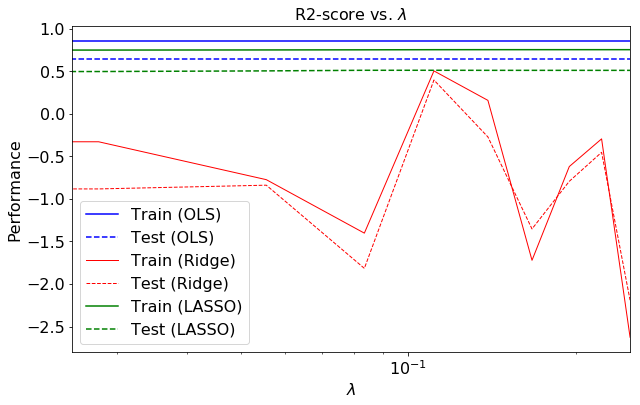

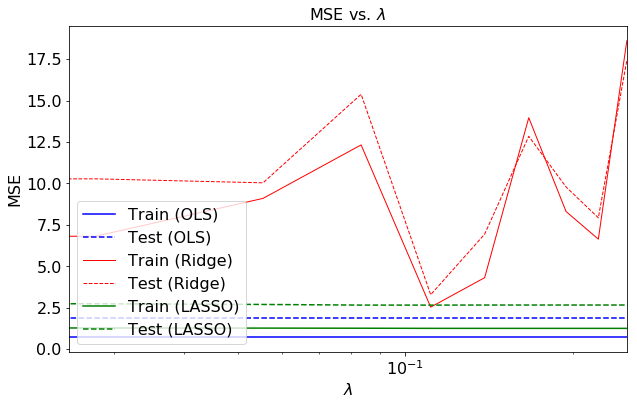

In [16]:
lambdas = np.linspace(0,0.25,10) # different lambda values

data = design_matrix
output = np.log10(V_Z_ageM.ravel()+C)

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

#### Women's fitting

In [24]:
### Defining design matrix and prediction matrix
order = 9          # polynomial order
iterations = 10000 # number of iterations use 

# x and y axis
C = 0.0001 # constant used to tackle zeros
rows = V_y_age
cols = V_x_age
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)

## predictions matrix
ynew = [i for i in range(2000,2070)]   # years
xnew = np.arange(0,70)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

In [25]:
## error minimization method

ols = LinearRegression(fit_intercept=True).fit(design_matrix, np.log10(V_Z_ageW.ravel()+C))
#ridge = Ridge(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(V_Z_ageW.ravel()+C))
lasso = Lasso(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(V_Z_ageW.ravel()+C))

beta_female = ols.coef_

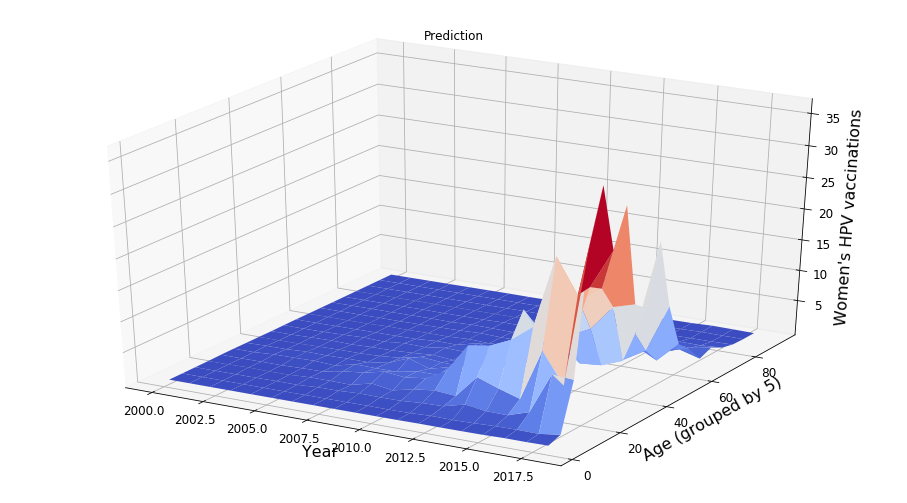

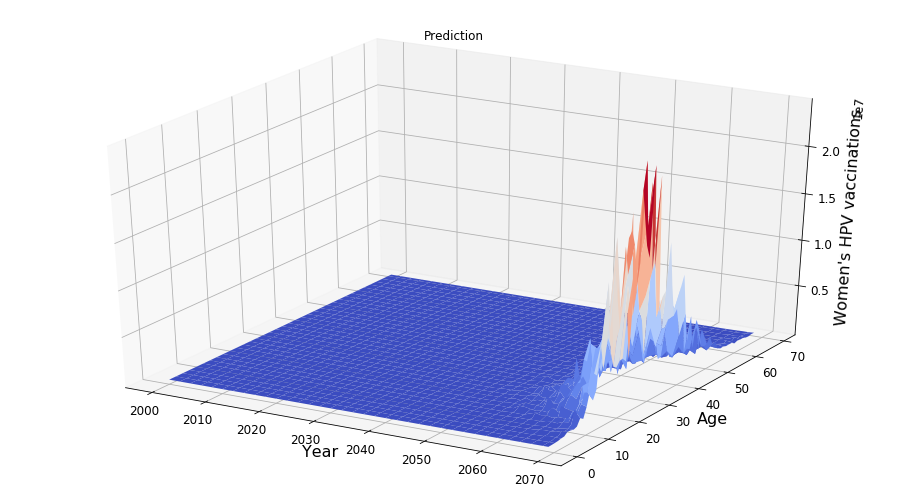

In [26]:
# same scaling
temp = np.exp(lasso.predict(design_matrix))-C
Zpredic = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=V_y_age, Y=V_x_age, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', Zlabel="Women's HPV vaccinations")

# different scaling
temp = np.exp(lasso.predict(Xnew))-C
Zpredic = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=ynew, Y=xnew, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age', Zlabel="Women's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 1.1547 and the r^2-score is: 0.8468.
    The test MSE is: 1.5449 and the r^2-score is: 0.8068
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 1.3564 and the r^2-score is: 0.8201.
    The test MSE is: 1.6727 and the r^2-score is: 0.7908
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 2.1468 and the r^2-score is: 0.7153.
    The test MSE is: 2.7319 and the r^2-score is: 0.6584
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 1.19394; the train average R^2-score for fold 1 is: 0.85
The test average MSE for fold 1 is: 1.76193; the test average R^2-score for fold 1 is: 0.75
The train average MSE for fold 2 is: 1.26250; 

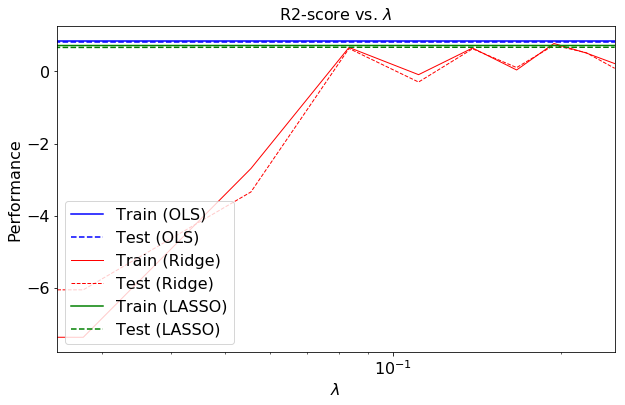

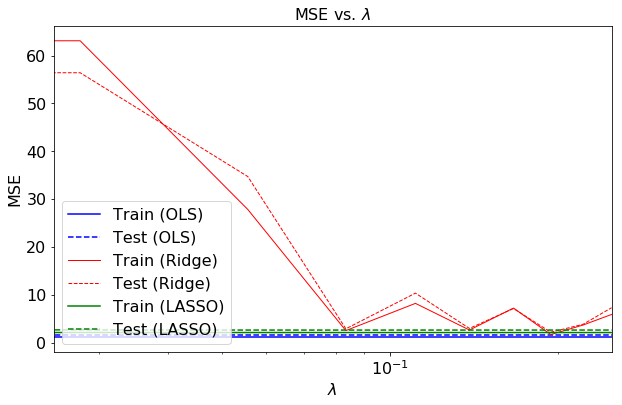

In [27]:
lambdas = np.linspace(0,0.25,10) # different lambda values

data = design_matrix
output = np.log10(V_Z_ageW.ravel()+C)

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

### Saving beta parameters

In [28]:
file_save = 'beta_parameters/HPV_parameters.mat' # saving at/saving as

sio.savemat(file_save,{'beta_female':beta_female,'beta_male':beta_male})